In [ ]:
# IMPORT LIBRARY
from os import X_OK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, average_precision_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score

In [ ]:
# import dataset dari google drive

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

link = 'https://drive.google.com/file/d/1-yevjM9OYrdVapZiozGUydye07CAsH-f/view'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('online_shoppers_intention.csv')

df = pd.read_csv('online_shoppers_intention.csv')
data = df
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
# HAPUS MISSING VALUE

In [ ]:
df.isnull()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values in each column
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df = df.dropna()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
# --------- ENCODING -----------

In [ ]:
data[:10]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
# ENCODING VISITOR TYPE

# change new_visitor = 0, returning_visitor = 1, other = 2

columns_to_convert = ['VisitorType']

for column in columns_to_convert:
    data[column] = data[column].map({'Returning_Visitor': 1, 'New_Visitor': 0, 'Other':2})

data[:10] #read first 10 data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,1,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,1,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,1,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,1,False,False


In [ ]:
# ENCODING WEEKEND SAMA REVENUE

# change new_visitor = 0, returning_visitor = 1

columns_to_convert = ['Weekend', 'Revenue']

for column in columns_to_convert:
    data[column] = data[column].map({True: 1, False: 0})  # Mapping boolean True/False

data[:10]  # Read first 10 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,1,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,1,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,1,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,1,0,0


In [ ]:
# ENCODING MONTH
# Ubah nama bulan ke angka: Jan=1, Feb=2, ..., Dec=12
columns_to_convert = ['Month']

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

for column in columns_to_convert:
    data[column] = data[column].map(month_mapping)

# Tampilkan 10 data pertama
data[:10]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,1,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,1,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,1,0,0


In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


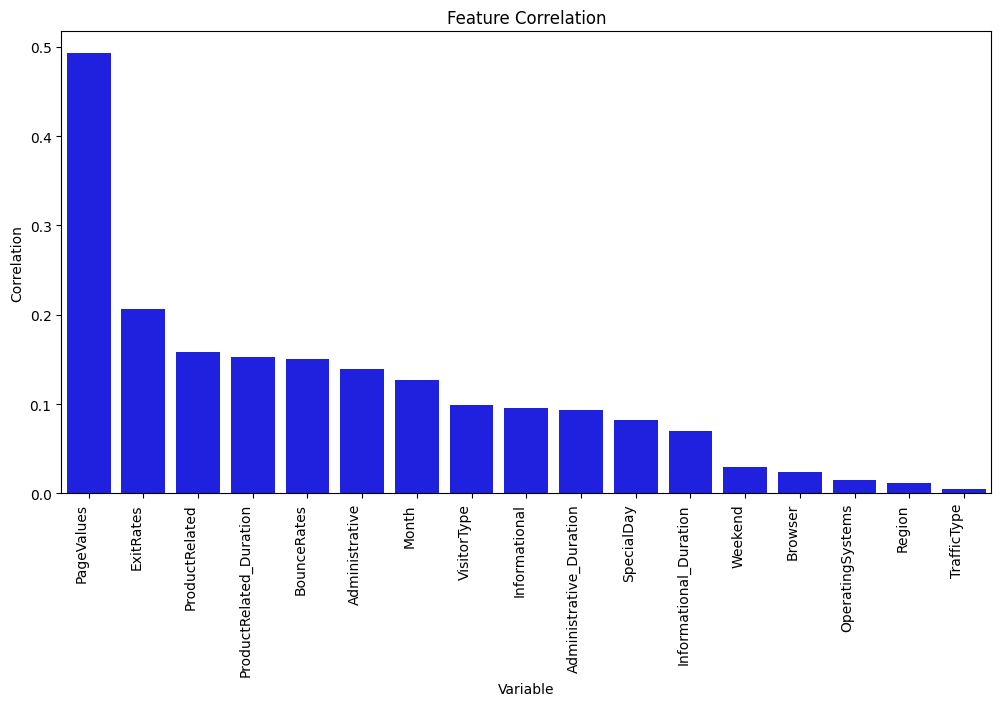

In [ ]:
# ----------- FEATURE SELECTION ------------------

# # data (ilangin month FOR NOW, bingung encodingnya bentar)
# data_pearson = data.drop(columns=['Month'])

data_pearson = data

# DataFrame
correlation_matrix = data_pearson.corr(method='pearson')

# Extract correlations with the 'class' column
class_correlations = correlation_matrix['Revenue'].drop('Revenue')  # Exclude correlation with itself

# Sort correlations in descending order
class_correlations_sorted = class_correlations.sort_values(ascending=False)

#jadiin korelasinya positif semua (??? GATAU BENER ATAU NGGAK KALO SALAH NTAR HAPUS)
class_correlations_sorted_pos = abs(class_correlations_sorted)
class_correlations_sorted_pos_1 = class_correlations_sorted_pos.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=class_correlations_sorted_pos_1.index, y=class_correlations_sorted_pos_1.values, color='blue')
plt.title('Feature Correlation')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
class_correlations_sorted_pos_1

,Revenue
PageValues,0.492569
ExitRates,0.207071
ProductRelated,0.158538
ProductRelated_Duration,0.152373
BounceRates,0.150673
Administrative,0.138917
Month,0.127372
VisitorType,0.098706
Informational,0.095200
Administrative_Duration,0.093587


In [ ]:
# ambil top 10 fitur teratas

top_10_pearson = class_correlations_sorted_pos_1.head(10)
top_10_pearson

,Revenue
PageValues,0.492569
ExitRates,0.207071
ProductRelated,0.158538
ProductRelated_Duration,0.152373
BounceRates,0.150673
Administrative,0.138917
Month,0.127372
VisitorType,0.098706
Informational,0.095200
Administrative_Duration,0.093587


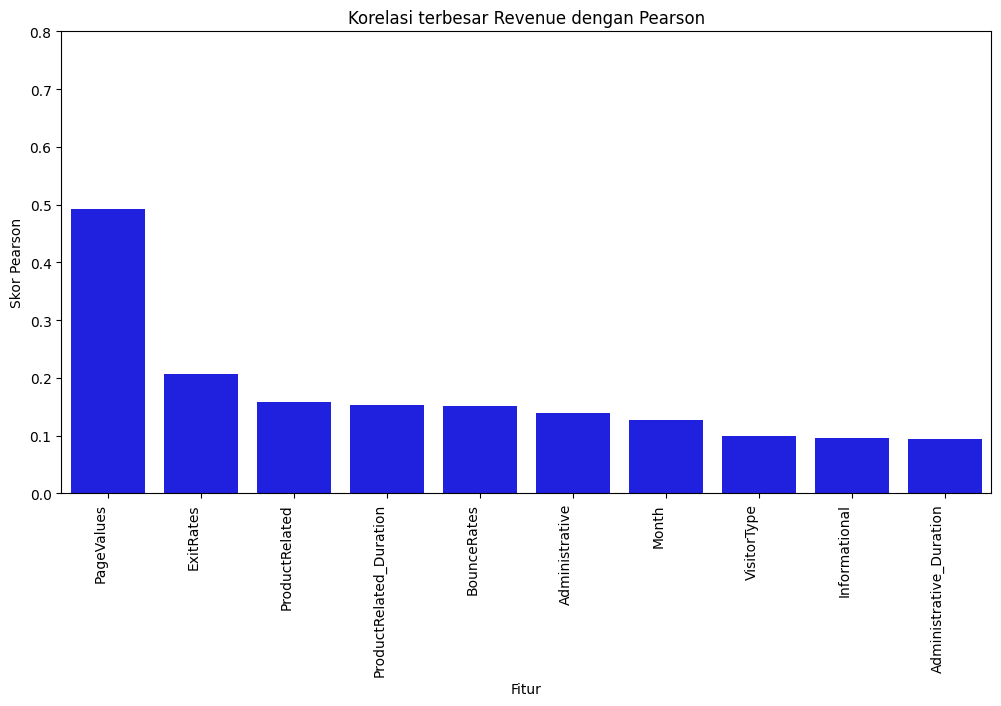

In [ ]:
# Create a bar plot for the top 5 highest correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_pearson.index, y=top_10_pearson.values, color='blue')
plt.title('Korelasi terbesar Revenue dengan Pearson')
plt.xlabel('Fitur')
plt.ylabel('Skor Pearson')
plt.xticks(rotation=90, ha='right')  # puter label 90 derajat

# Set y-axis limits
plt.ylim(0.0, 0.8)

plt.show()

In [ ]:
# BIKIN DATAFRAME BARU PAKE TOP 10 FITUR PEARSON

# Mengambil nama fitur dari tabel 10 fitur teratas berdasarkan skor PCA
pearson_feature_names = top_10_pearson.index.values

# Membuat dataframe baru hanya dengan fitur yang memiliki 10 skor PCA tertinggi
pearson_feature_data = data[pearson_feature_names]

# Menambahkan kolom target 'Revenue'
class_columns = ['Revenue']
data_baru_pearson = pd.concat([pearson_feature_data, data[class_columns]], axis=1)

# Menampilkan hasilnya
data_baru_pearson

,PageValues,ExitRates,ProductRelated,ProductRelated_Duration,BounceRates,Administrative,Month,VisitorType,Informational,Administrative_Duration,Revenue
0,0.000000,0.200000,1,0.000000,0.200000,0,2,1,0,0.0,0
1,0.000000,0.100000,2,64.000000,0.000000,0,2,1,0,0.0,0
2,0.000000,0.200000,1,0.000000,0.200000,0,2,1,0,0.0,0
3,0.000000,0.140000,2,2.666667,0.050000,0,2,1,0,0.0,0
4,0.000000,0.050000,10,627.500000,0.020000,0,2,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
12325,12.241717,0.029031,53,1783.791667,0.007143,3,12,1,0,145.0,0
12326,0.000000,0.021333,5,465.750000,0.000000,0,11,1,0,0.0,0
12327,0.000000,0.086667,6,184.250000,0.083333,0,11,1,0,0.0,0
12328,0.000000,0.021053,15,346.000000,0.000000,4,11,1,0,75.0,0


In [ ]:
# SPLIT DATASET (training : 70 testing :30)
# datanya pake yg data_feature_2 (udah feature selection sama udah digabungin sama class)
# target = kolom "Revenue"
X = data_baru_pearson.drop('Revenue', axis=1)
y = data_baru_pearson['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
# Undersampling

undersample = RandomUnderSampler(sampling_strategy=0.7) #sampling_strategy = percentage relative to minority class

# Apply RandomUnderSampler
X_train_undersample,y_train_undersample = undersample.fit_resample(X_train,y_train)

# Display the counts of each class in y_train before resampling
print("Rasio data sebelum RandomUnderSampler:")
print(y_train.value_counts())

# After applying RandomUnderSampler
print("Rasio data setelah RandomUnderSampler:")
print(y_train_undersample.value_counts())


Rasio data sebelum RandomUnderSampler:
Revenue
0    7298
1    1333
Name: count, dtype: int64
Rasio data setelah RandomUnderSampler:
Revenue
0    1904
1    1333
Name: count, dtype: int64


XG BOOST SETELAH DOWNSAMPLING

Accuracy: 0.8508
Precision: 0.4437
F1-Score: 0.6270
AUC Score: 0.8329
Cohen’s Kappa Score: 0.5395
Confusion Matrix:
[[2683  441]
 [ 111  464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3124
           1       0.51      0.81      0.63       575

    accuracy                           0.85      3699
   macro avg       0.74      0.83      0.77      3699
weighted avg       0.89      0.85      0.86      3699



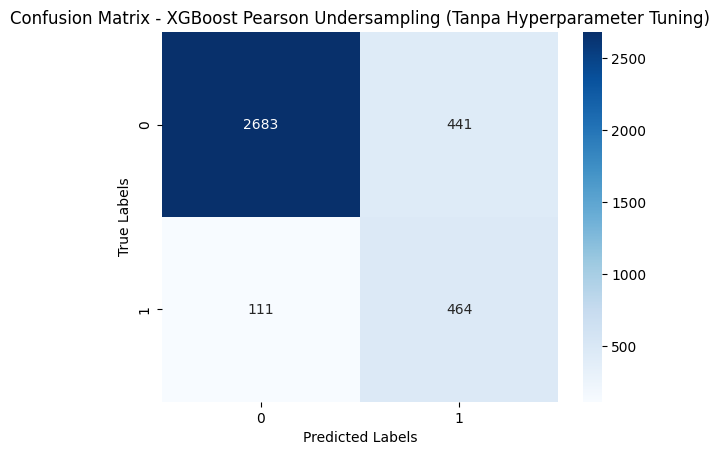

In [ ]:
# Inisialisasi XGBoost classifier dengan default hyperparameter
xgb_classifier = XGBClassifier(random_state=42)

# Training data
xgb_classifier.fit(X_train_undersample, y_train_undersample)

# Prediksi menggunakan X_test
y_pred = xgb_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
accuracy_xgb_default_undersampling = accuracy

precision = average_precision_score(y_test, y_pred)
precision_xgb_default_undersampling = precision

f1score = f1_score(y_test, y_pred)
f1score_xgb_default_undersampling = f1score

auc_score = roc_auc_score(y_test, y_pred)  # Menggunakan probabilitas untuk AUC
kappa_score = cohen_kappa_score(y_test, y_pred)  # Menghitung Cohen's Kappa Score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan metrik evaluasi
print(f'Accuracy: {accuracy_xgb_default_undersampling:.4f}')
print(f'Precision: {precision_xgb_default_undersampling:.4f}')
print(f'F1-Score: {f1score_xgb_default_undersampling:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print(f'Cohen’s Kappa Score: {kappa_score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Pearson Undersampling (Tanpa Hyperparameter Tuning)')
plt.show()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:44:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'eta': 0.01}
Accuracy: 0.8694
Precision: 0.4826
F1-Score: 0.6615
AUC Score: 0.8496
Cohen’s Kappa Score: 0.5844
Confusion Matrix:
[[2744  380]
 [ 103  472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3124
           1       0.55      0.82      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



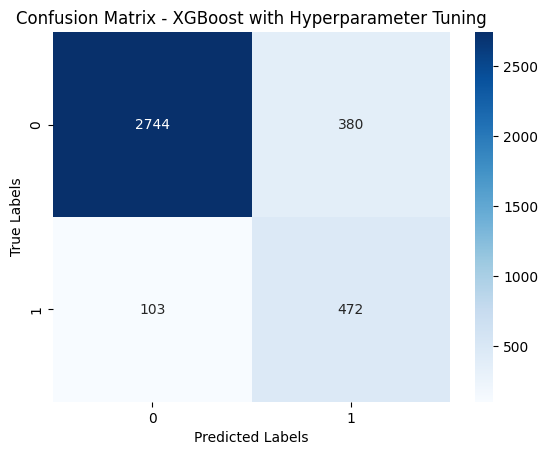

In [ ]:
# ---------------<< INI YG PAKE HYPER PARAMETER TUNING >>---------------
# Inisialisasi model XGBoost
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Menentukan parameter yang ingin dituning
param_dist = {
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'eta': [0.01, 0.1, 0.2]
}

# # Menggunakan GridSearchCV untuk mencari parameter terbaik
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
#                            scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Menggunakan RandomizedSearchCV untuk mencari parameter terbaik
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=10, verbose=1, n_jobs=-1, random_state=42)


# # Melatih model dengan data training undersample
# grid_search.fit(X_train_undersample, y_train_undersample)

# # Mendapatkan model terbaik dari hasil grid search
# best_xgb = grid_search.best_estimator_

# # Prediksi menggunakan model terbaik di X_test
# y_pred = best_xgb.predict(X_test)

# Melatih model dengan data training yang menggunakan 10 fitur PCA teratas
random_search.fit(X_train_undersample, y_train_undersample)

# Mendapatkan model terbaik dari hasil random search
best_xgb = random_search.best_estimator_

# Prediksi menggunakan model terbaik di X_test
y_pred = best_xgb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = average_precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)  # Menggunakan probabilitas untuk AUC
kappa_score = cohen_kappa_score(y_test, y_pred)  # Menghitung Cohen's Kappa Score
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan metrik evaluasi
print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1score:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print(f'Cohen’s Kappa Score: {kappa_score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost with Hyperparameter Tuning')
plt.show()